# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

**The code for this notebook are from watching the videos and reviewing the notebooks from the Practical Data Science and Machine Learning sections.  For a few areas, I reviewed the low code version too.  I also noticed that Google Colab suggested many of the same code while I was typing this workbook.**

In [ ]:
# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')


# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

# Importing an advanced library for data visualization
import seaborn as sns

# Importing libraries for data visualization
import matplotlib.pyplot as plt


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# Importing the Machine Learning models we require from Scikit-Learn
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LogisticRegression

from sklearn import (
    tree,
    metrics,
    model_selection,
)

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    recall_score,
    precision_score,
    accuracy_score,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    make_scorer,
    classification_report,
    confusion_matrix,
    f1_score,
)

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
)

## Data for Project

- Connecting to drive
- Reading the data file
- Making a copy of the data for use

In [ ]:
# Since I was using Google Colab, I had to use this code to mount the google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the ExtraaLearn dataset file
data = pd.read_csv('/content/drive/MyDrive/00_Projects/02_Elect Proj/ExtraaLearn.csv')

In [ ]:
# Copying data to another variable to avoid any changes to original data
data_copy = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Showing the beginning and end of the columns in the data
data_copy

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [ ]:
# View the first 5 rows of the dataset
data_copy.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# View the first 5 rows of the dataset
data_copy.tail()

NameError: name 'data_copy' is not defined

In [ ]:
# The number of columns and row in the data set
data_copy.shape

(4612, 15)

In [ ]:
# Method to check the info of the data
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

The data has 4612 rows and no data is missing.  The dataset has float, int, and object data types.

In [ ]:
# Checking for any missing values just in case
data_copy.isnull().sum()

NameError: name 'data_copy' is not defined

**Observations:**

There are no null values.

In [ ]:
# Let's also check for duplicate rows in the dataset
data_copy.duplicated().sum()

0

**Observations:**

There are no duplicates in the data.

In [ ]:
# Number of unique values in each column
data_copy.nunique()

NameError: name 'data_copy' is not defined

**Observations:**

The ID column are all unique values and can be dropped.  The age, website_visits, time_spent_on_website, and page_views_per_visit have a larger amount of unique values, and are all numerical values.  Status is a numerical value too and is our dependent value.  The other columns are categorical values and have low number of unique values.

In [ ]:
# Dropping the ID columns since each value is unique
data_copy.drop(columns=['ID'], inplace=True)

In [ ]:
# Showing the beginning and end of the columns in the data
data_copy

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


**Observations:**

Dropped the ID column and checked the data to verify the column is dropped.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [ ]:
# Let's view the statistical summary of the columns in the dataset
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.000,46.201,13.161,18.000,36.000,51.000,57.000,63.000
website_visits,4612.000,3.567,2.829,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4612.000,724.011,743.829,0.000,148.750,376.000,1336.750,2537.000
page_views_per_visit,4612.000,3.026,1.968,0.000,2.078,2.792,3.756,18.434
status,4612.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000


**Observations:**

Reviewing the statistical data for the numerical columns.  This may come in handy later in the workbook.  We do have some right and left skewed data and some that is closer to center.

In [ ]:
# Creating catagorical columns and printing their data in a format to show the percentage of each area in each column
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for column in cat_col:
    print(data_copy[column].value_counts(1))
    print('-'*50)

current_occupation
Professional   0.567
Unemployed     0.312
Student        0.120
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website      0.551
Mobile App   0.449
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High     0.491
Medium   0.486
Low      0.023
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity     0.494
Phone Activity     0.268
Website Activity   0.239
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No    0.892
Yes   0.108
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No    0.949
Yes   0.051
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No    0.886
Yes   0.114
Name: proportion, dtype: float64
--------------------------------------------------


**Observations:**

Reviewing the categorical data for the object columns. This may come in handy later in the workbook.  It shows the percentages and breakdown of areas per column.

In [ ]:
# Value counts for the status column, which is the dependent variable
data_copy['status'].value_counts()

status
0    3235
1    1377
Name: count, dtype: int64

In [ ]:
# Percentage distribution of the status column, which is the dependent variable
data_copy['status'].value_counts(1)*100

status
0   70.143
1   29.857
Name: proportion, dtype: float64

**Observations:**

Reviewing the count and percentage of contacts that are converted to customers.  It looks like about 30 percet of the contacts are converted.

## Individual Column Data Analysis

In [1]:
# Defining the hist_box() function for the numerical columns
def hist_box(data, feature, figsize=(12, 7), kde=True, bins=None):
  figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)

  # Adding a graph in each part
  sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color='violet')

  if bins==None:
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)
  else:
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)

  ax_hist.axvline(data[feature].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
  ax_hist.axvline(data[feature].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot

## **age**

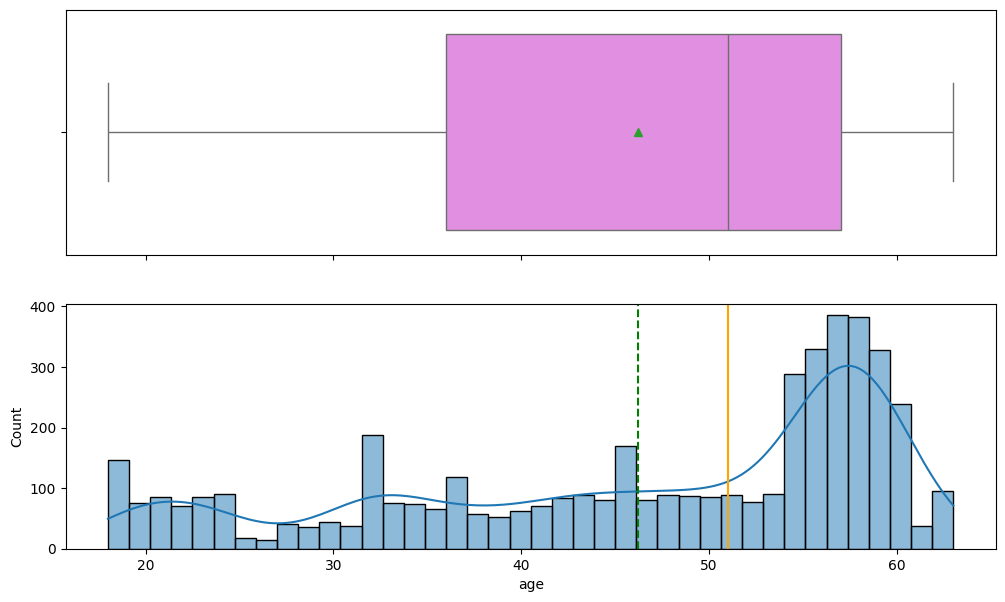

In [ ]:
# Histogram/boxplot for age column
hist_box(data_copy, 'age', bins=40)

**Observations:**

The data for the age of the lead is left skewed and seems to have a minumum around 18 days.  This may be an indicator of leads that convert tend to convert earlier than the ones in the graph.

## **website_visits**

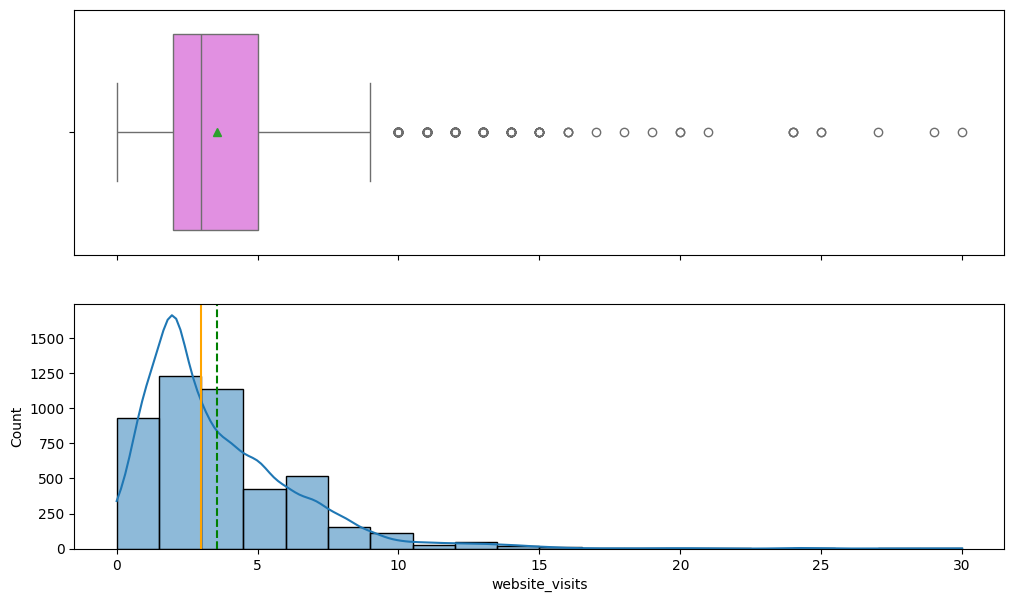

In [ ]:
# Histogram/boxplot for website_visits column
hist_box(data_copy, 'website_visits', bins=20)

**Observations:**

The data for website_visits is right skewed, with outliers.  The mean and median are around 3 visits.

## **time_spent_on_website**

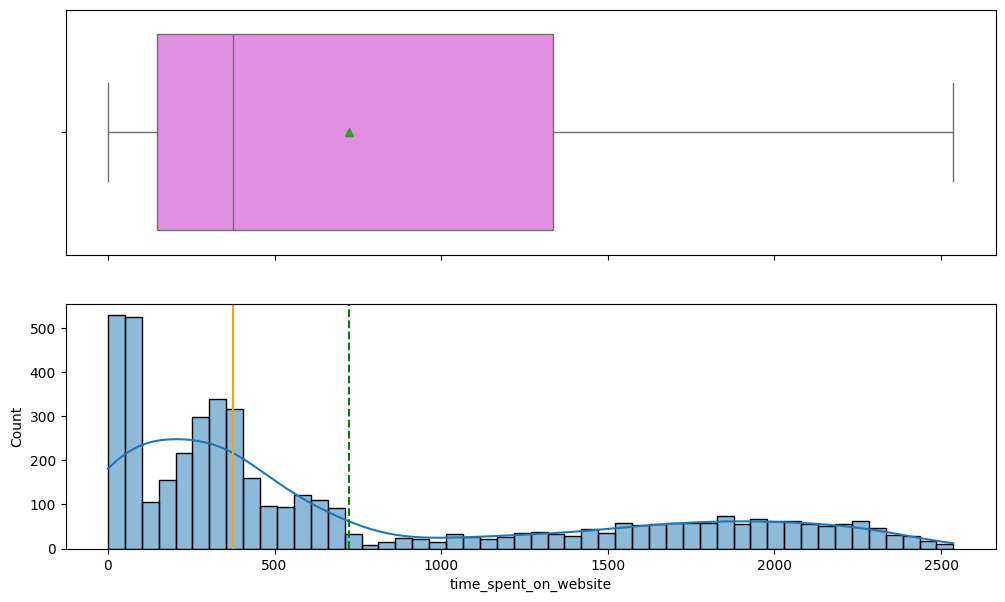

In [ ]:
# Histogram/boxplot for time_spent_on_website column
hist_box(data_copy, 'time_spent_on_website', bins=50)

**Observations:**

The data for time_spent_on_website is right skewed.  The mean is 724 and the median is 376.

## **page_views_per_visit**

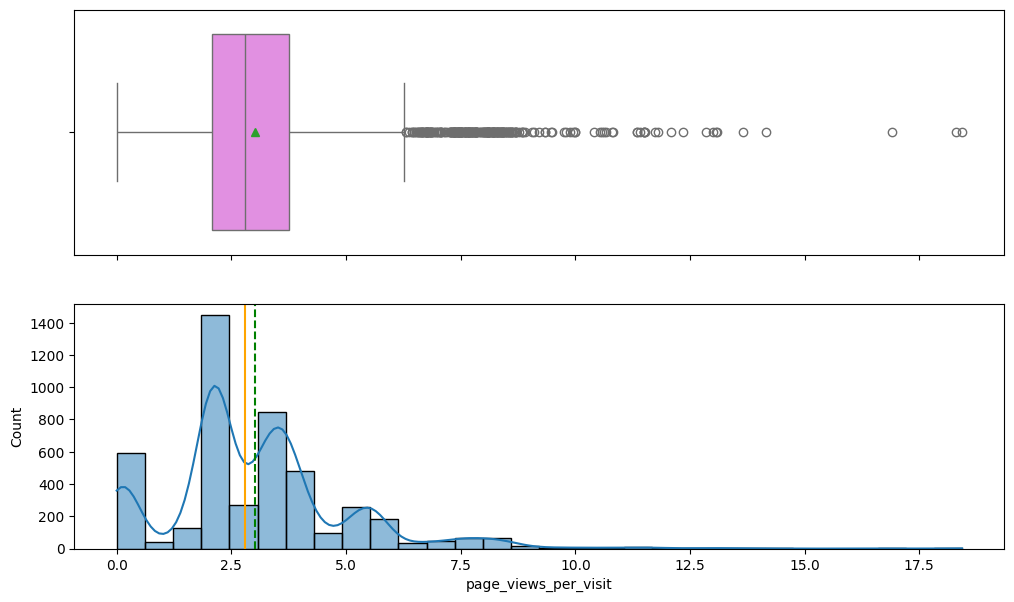

In [ ]:
# Histogram/boxplot for page_views_per_visit column
hist_box(data_copy, 'page_views_per_visit', bins=30)

**Observations:**

The data for page_views_per_visit is right skewed, with outliers, and has more than one peak.  The mean and median are around 3 pages.

In [ ]:
# Function to create labeled barplots for categorical variables

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 3, 5))
    else:
        plt.figure(figsize = (n + 3, 5))

    plt.xticks(rotation = 45, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Spectral",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

## **current_occupation**

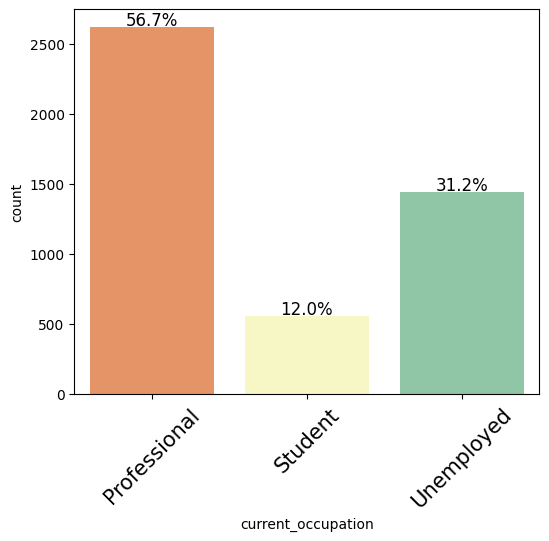

In [ ]:
# Labeled barplot for current_occupation column
labeled_barplot(data_copy, 'current_occupation', perc = True)

**Observations:**

Professional are the highest count with Unemployed being the second highest count.

## **first_interaction**

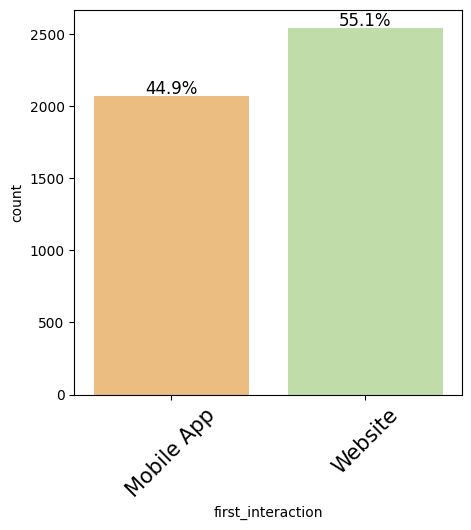

In [ ]:
# Labeled barplot for first_interaction column
labeled_barplot(data_copy, 'first_interaction', perc = True)

**Observations:**

Website visits are higher but not much higer in count.

## **profile_completed**

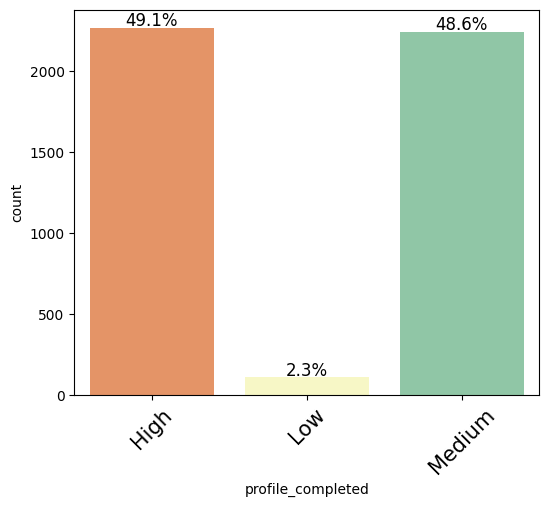

In [ ]:
# Labeled barplot for profile_completed column
labeled_barplot(data_copy, 'profile_completed', perc = True)

**Observations:**

High and medium profile completion are about the same amount of counts and make up almost all of the counts.

## **last_activity**

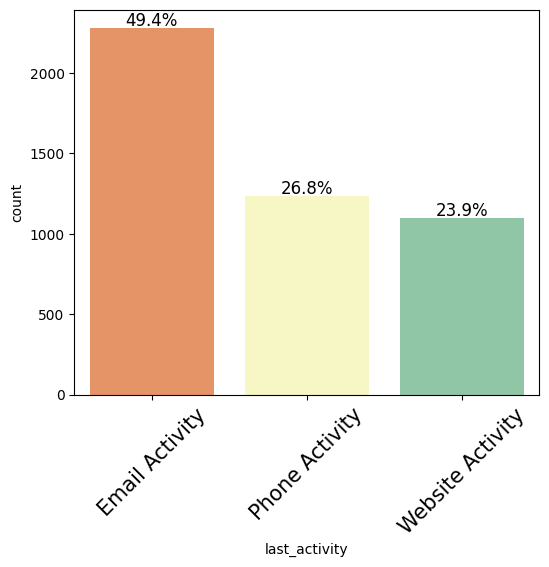

In [ ]:
# Labeled barplot for last_activity column
labeled_barplot(data_copy, 'last_activity', perc = True)

**Observations:**

Email activity has the highest count and is almost as much as the other to areas combined.

## **print_media_type1**

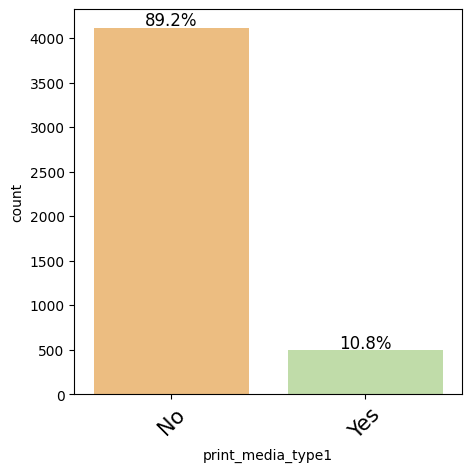

In [ ]:
# Labeled barplot for print_media_type1 column
labeled_barplot(data_copy, 'print_media_type1', perc = True)

**Observations:**

Print media type 1 is only about 11 percent yes.

## **print_media_type2**

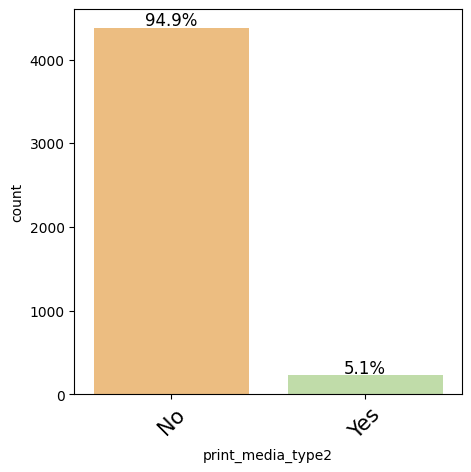

In [ ]:
# Labeled barplot for print_media_type2 column
labeled_barplot(data_copy, 'print_media_type2', perc = True)


**Observations:**

Print media type 2 is only about 5 percent yes.

## **digital_media**

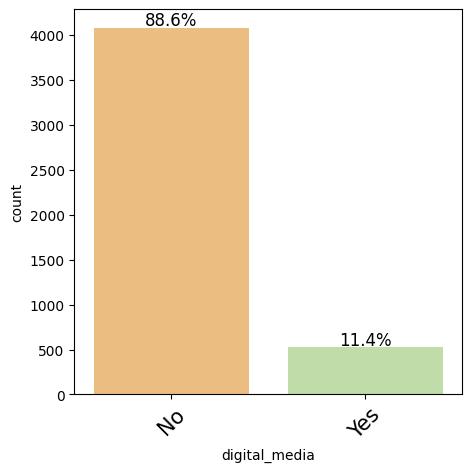

In [ ]:
# Labeled barplot for digital_media column
labeled_barplot(data_copy, 'digital_media', perc = True)

**Observations:**

Digital media is only about 11 percent yes.

## **educational_channels**

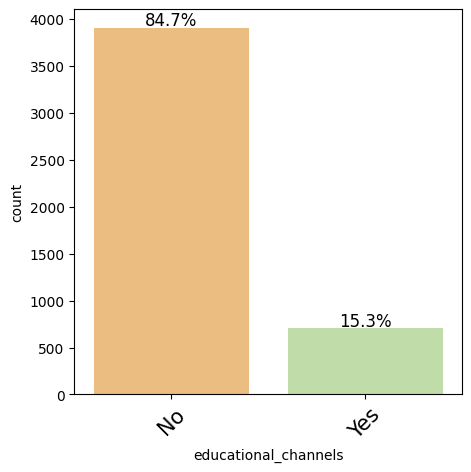

In [ ]:
# Labeled barplot for educational_channels column
labeled_barplot(data_copy, 'educational_channels', perc = True)

**Observations:**

Educational channels is only about 15 percent yes.

## **referral**

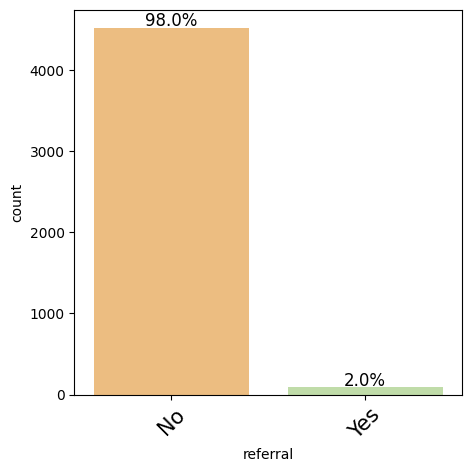

In [ ]:
# Labeled barplot for referral column
labeled_barplot(data_copy, 'referral', perc = True)

**Observations:**

Referral is only about 2 percent yes.

## **status**

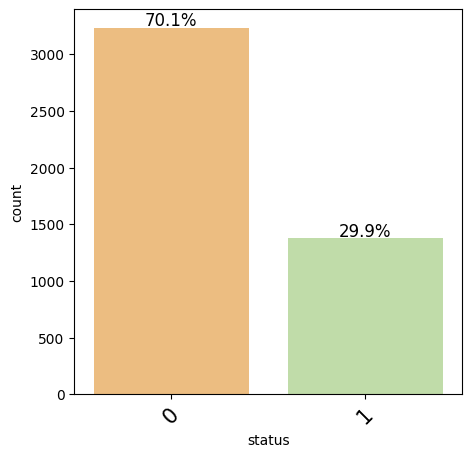

In [ ]:
# Labeled barplot for status column
labeled_barplot(data_copy, 'status', perc = True)

**Observations:**

Converted referrals are at about 30 percent.

## Multiple Column Comparison Data Analysis

In [ ]:
# Correlation of the numerical values
data_copy.corr(numeric_only=True)

,age,website_visits,time_spent_on_website,page_views_per_visit,status
age,1.000,-0.012,0.019,-0.041,0.122
website_visits,-0.012,1.000,0.062,0.074,-0.007
time_spent_on_website,0.019,0.062,1.000,0.068,0.302
page_views_per_visit,-0.041,0.074,0.068,1.000,0.000
status,0.122,-0.007,0.302,0.000,1.000


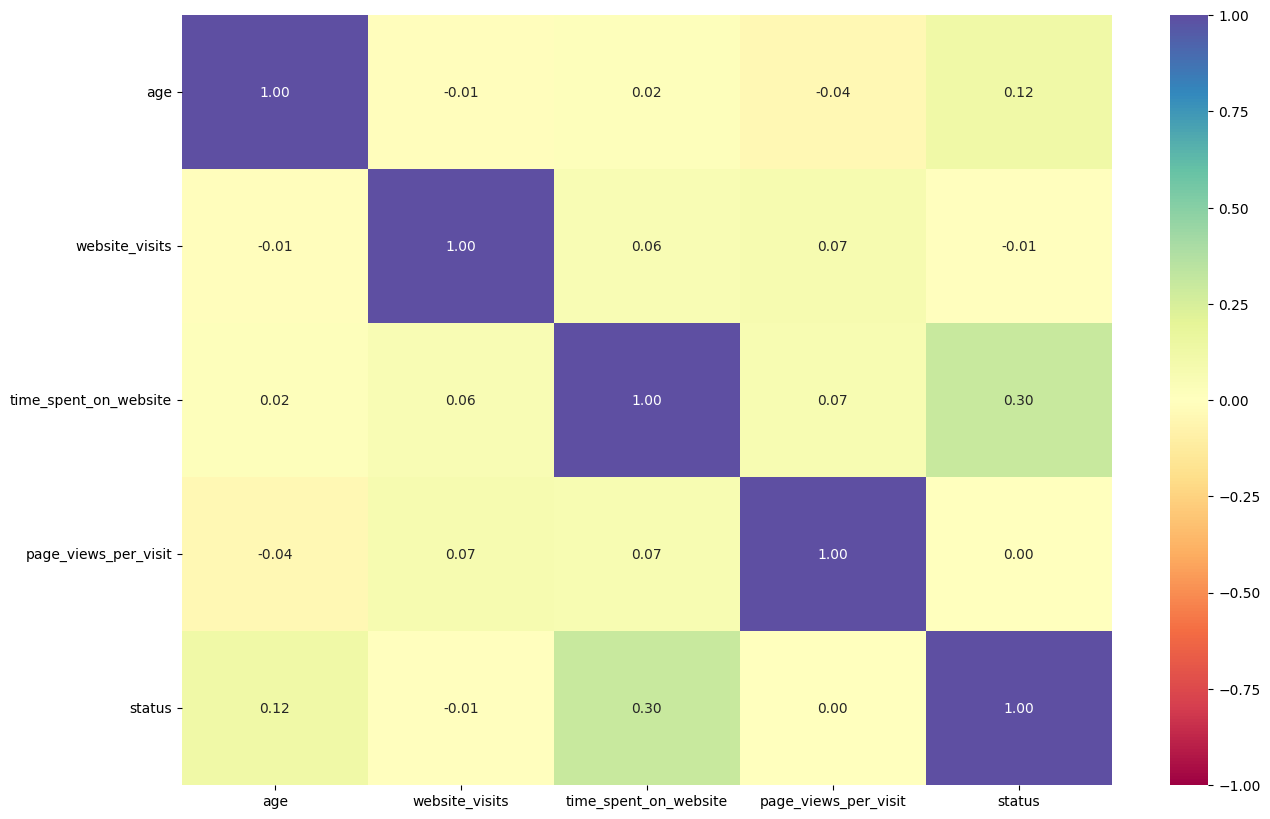

In [ ]:
# Creating heatmap to show the correlation between the numerical columns

plt.figure(figsize=(15,10))
sns.heatmap(data_copy.corr(numeric_only=True),annot=True,fmt=".2f", cmap='Spectral', vmin=-1, vmax=1)
plt.show()

**Observations:**

The highest correlation between the numerical values is between time_spent_on_website and status at about 30 percent.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# Stacked barplot to compare different columns in the data.
def stacked_barplot(data, predictor, target):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target]).sort_values(by=sorter, ascending=False)
  print(tab1)
  tab = pd.crosstab(data[predictor], data[target], normalize = 'index').sort_values(by=sorter, ascending=False)

  tab.plot(kind = 'bar', stacked = True, figsize = (count+3, 5), colormap = 'Accent')
  plt.legend(loc = 'upper left')
  plt.xticks(rotation=45)
  plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), frameon = True)

## **How current occupation affects lead conversion**

status                 0    1
current_occupation           
Professional        1687  929
Unemployed          1058  383
Student              490   65


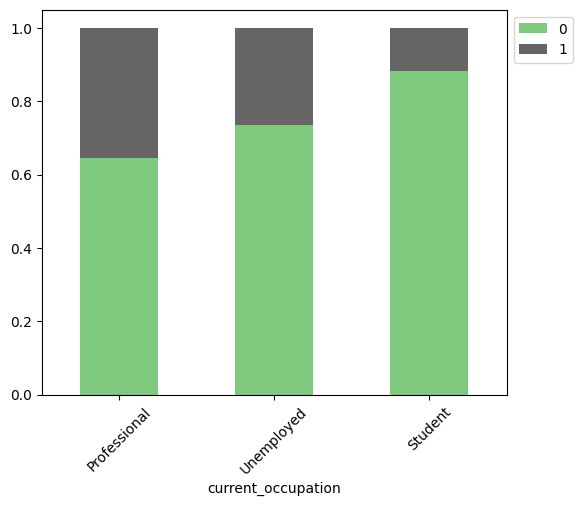

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'current_occupation', 'status')

**Observations:**

Professionals have the higest count and have the highest percentage of lead conversions.  Unemployed people have the second highest count and percentage of lead conversions.

## **current_occupation vs. age**

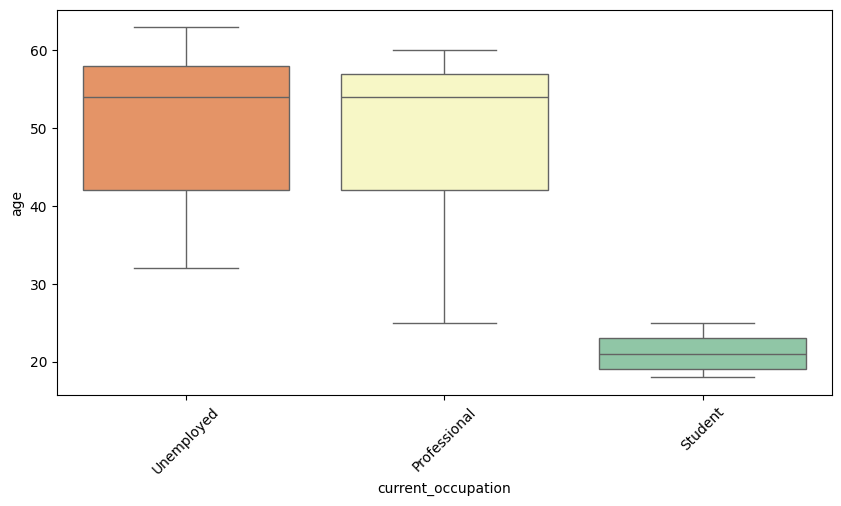

In [ ]:
# Boxplot to compare current_occupation and age of the lead
plt.figure(figsize=(10, 5))
sns.boxplot(data = data_copy, x = "current_occupation", y = "age", palette="Spectral")
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_copy.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.000,49.347,9.891,25.000,42.000,54.000,57.000,60.000
Student,555.000,21.144,2.001,18.000,19.000,21.000,23.000,25.000
Unemployed,1441.000,50.140,10.000,32.000,42.000,54.000,58.000,63.000


**Observations:**

The average age of leads is around the same area for both Unemployed and Professional, approximately a number in the mid 50s.  The age of leads for students is a little more than 20.  It seems like student leads may be more likely to be converted quickly.

## **How first interaction affects lead conversion**

status                0     1
first_interaction            
Website            1383  1159
Mobile App         1852   218


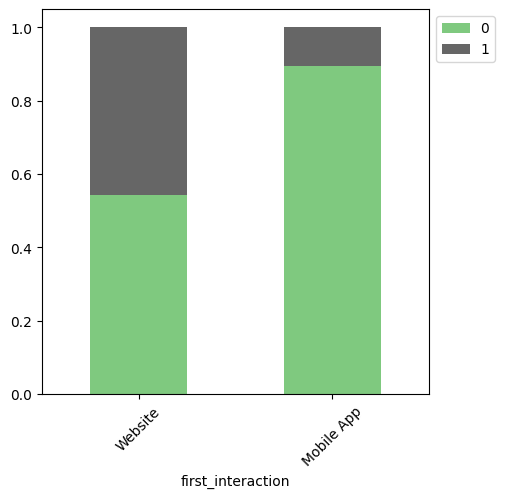

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'first_interaction', 'status')

**Observations:**

Website interaction has the higest count and has the highest percentage of lead conversions by a large margin.

## **How modes of interaction affects lead conversion**

status               0    1
last_activity              
Email Activity    1587  691
Website Activity   677  423
Phone Activity     971  263


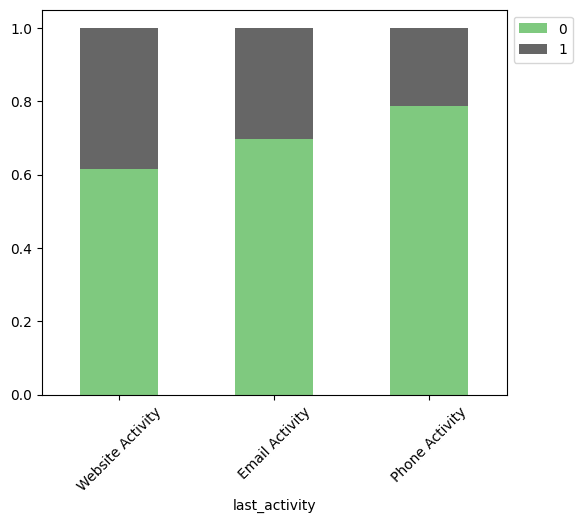

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'last_activity', 'status')

**Observations:**

Email activity has the largest count of contacts, and website and phone activity have about the same amount of counts of contacts.  Website activity has the highest percentage of lead conversion, followed by email activity.

## **How leads from various channels affects lead conversion**

status                0     1
print_media_type1            
No                 2897  1218
Yes                 338   159


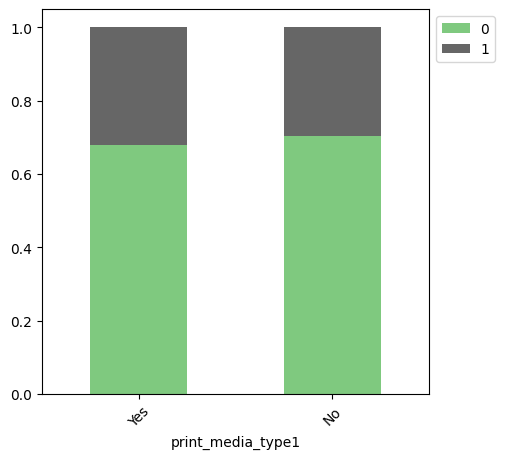

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'print_media_type1', 'status')

**Observations:**

Print media type 1 (newspaper) has about an 11 percent yes rate and about a 32 percent conversion rate.

status                0     1
print_media_type2            
No                 3077  1302
Yes                 158    75


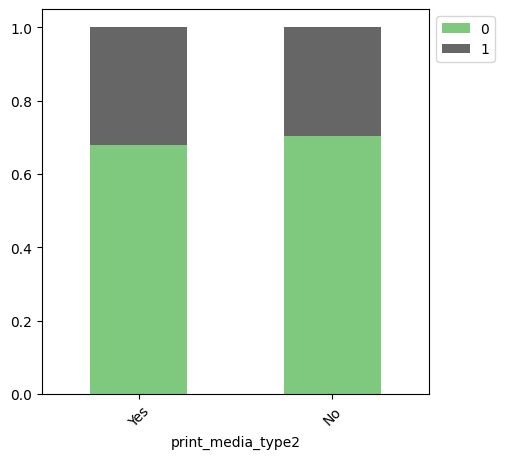

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'print_media_type2', 'status')

**Observations:**

Print media type 2 (magazine) has about a 5 percent yes rate and about a 33 percent conversion rate.

status            0     1
digital_media            
No             2876  1209
Yes             359   168


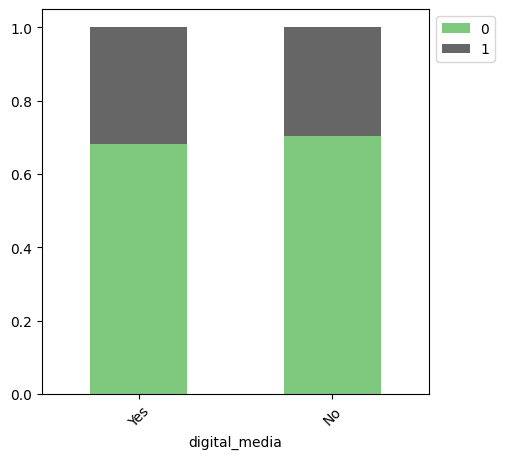

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'digital_media', 'status')

**Observations:**

Digital media has about a 12 percent yes rate and about a 31 percent conversion rate.

status                   0     1
educational_channels            
No                    2727  1180
Yes                    508   197


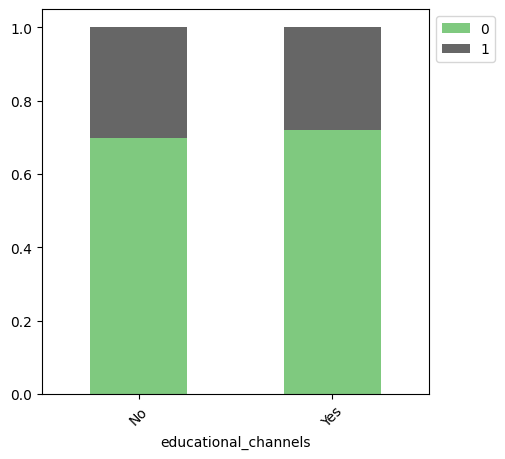

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'educational_channels', 'status')

**Observations:**

Educational channels has about a 15 percent yes rate and about a 29 percent conversion rate.

status       0     1
referral            
No        3205  1314
Yes         30    63


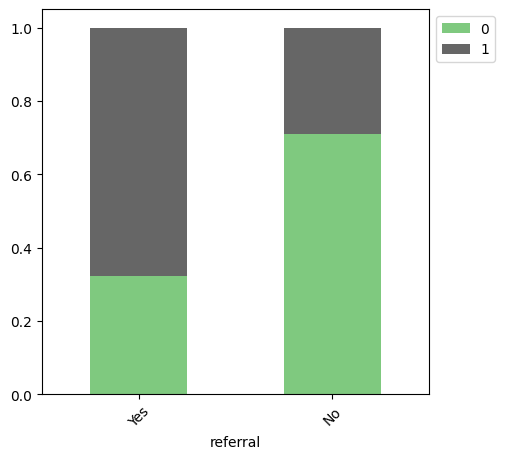

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'referral', 'status')

**Observations:**

Referrals has about an 2 percent yes rate and about a 68 percent conversion rate.  This may be a great area to try and help improve on since the conversion rates are so high and the percentage of referrals is so low.

## **How percentage of profile completed affects lead conversion**

status                0    1
profile_completed           
High               1318  946
Medium             1818  423
Low                  99    8


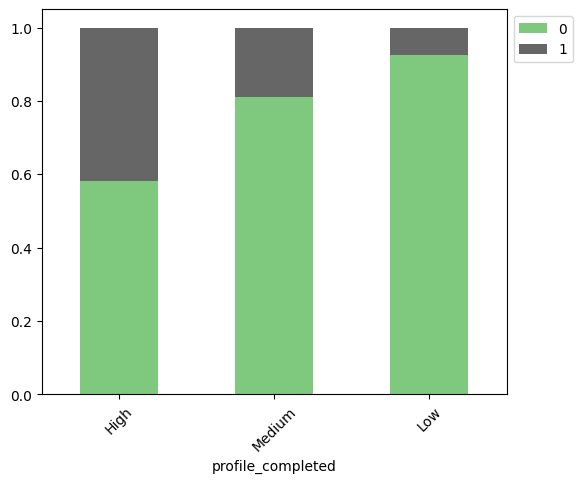

In [ ]:
# Stacked barplot of 2 categorical values
stacked_barplot(data_copy, 'profile_completed', 'status')

**Observations:**

Profile completion rates for High and Medium have about the same counts, with High having about a 42 percent conversion rate which is more than double that of the Medium percentage.  Low completion rate has a minimal count and conversion rate.

## **time_spent_on_website vs. status**

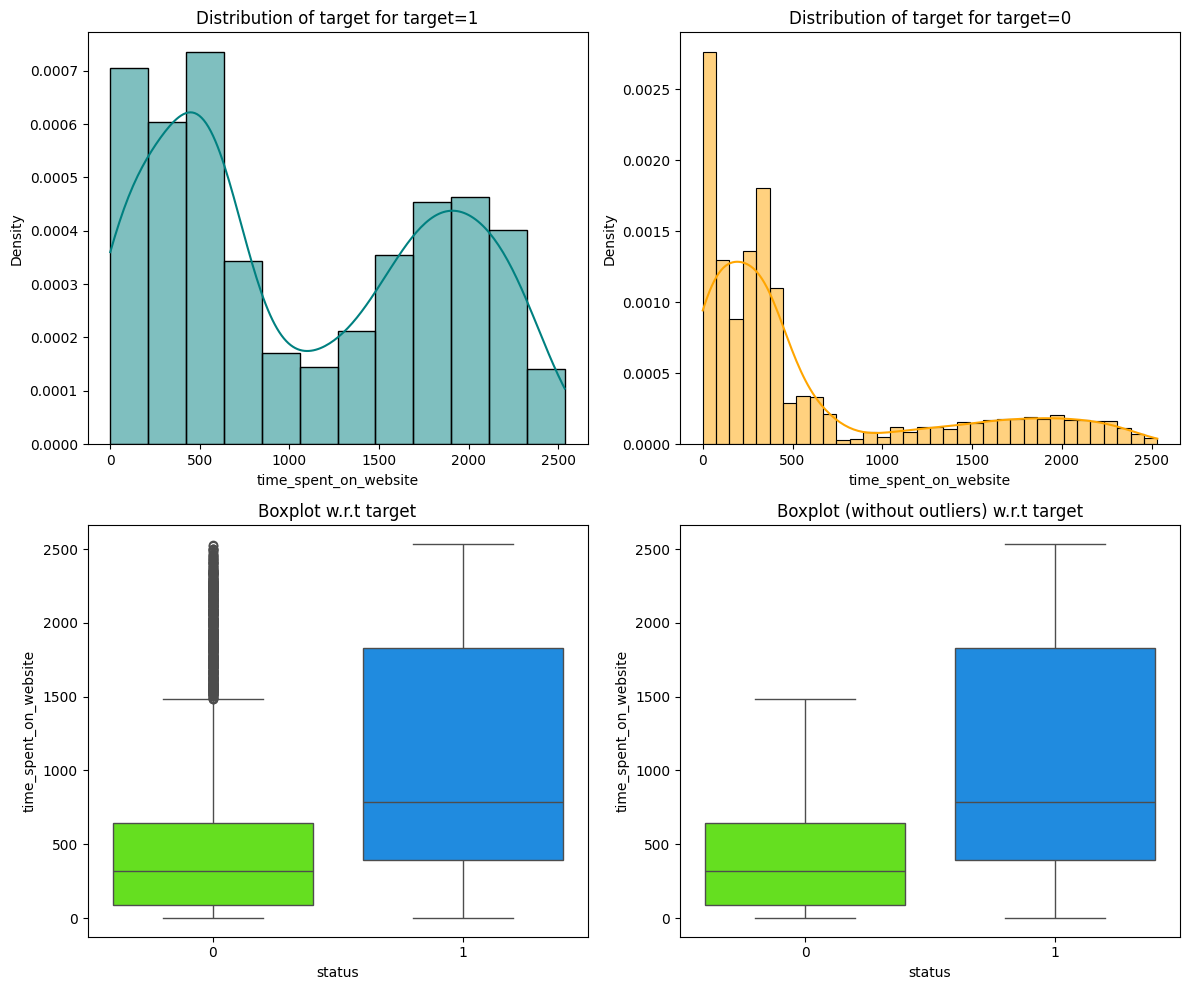

In [ ]:
# Distribution plot for the numerical values time_spent_on_website and status
distribution_plot_wrt_target(data_copy, "time_spent_on_website", "status")

In [ ]:
# checking the median value
data_copy.groupby(["status"])["time_spent_on_website"].median()

status
0   317.000
1   789.000
Name: time_spent_on_website, dtype: float64

**Observations:**

The data for status of 1 seems to have to peaks and for 0 is right skewed.  There are also quite a few outliers for status 0.  More importantly is seems that people who spend more time on the website (over 2x as much time as status 0) are more likely to convert the lead.

## **website_visits vs. status**

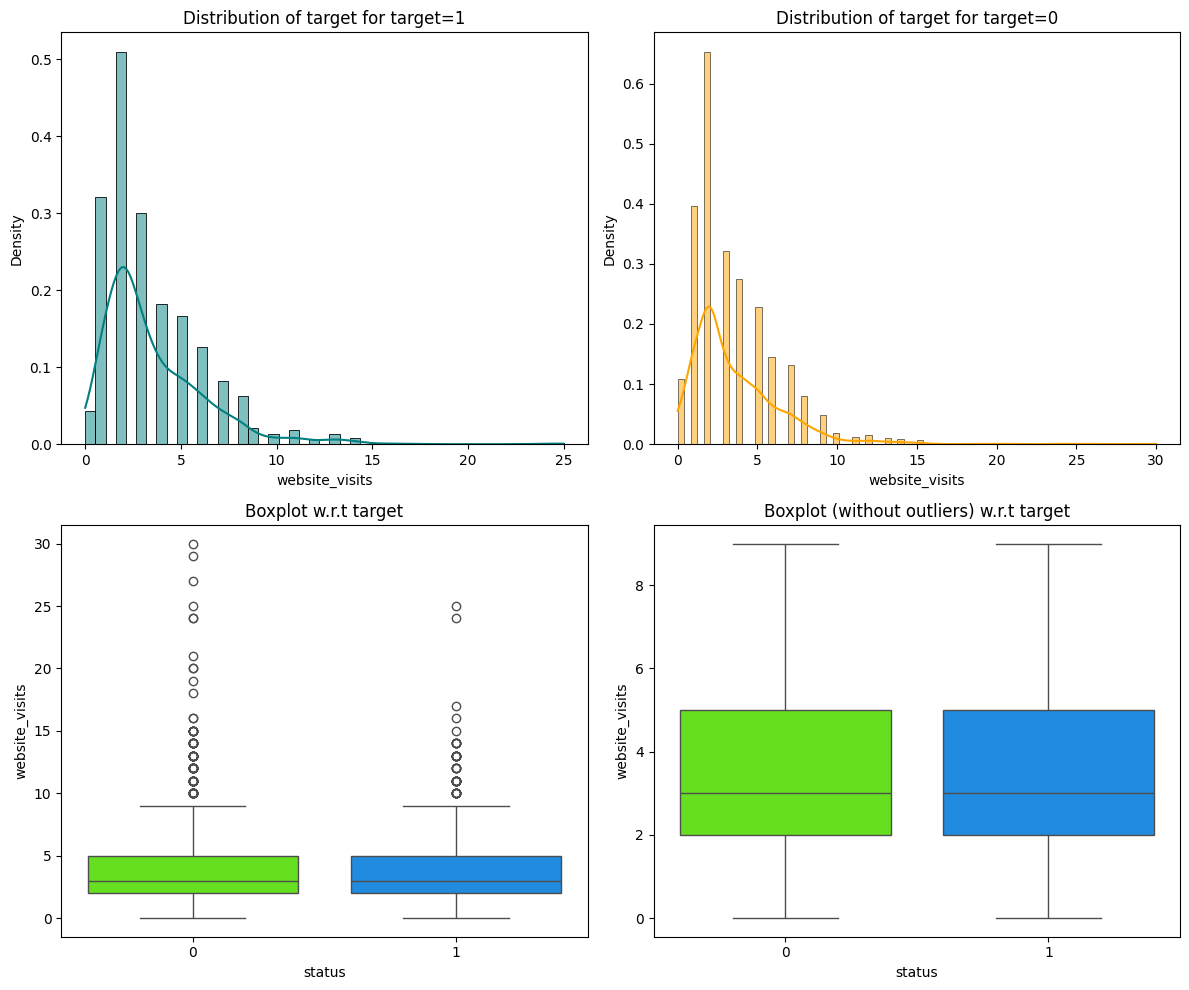

In [ ]:
# Distribution plot for the numerical values website_visits and status
distribution_plot_wrt_target(data_copy, "website_visits", "status")

**Observations:**

The website_visits data is skewed right and has quite a few outliers for status of 0 and 1.  Both status of 0 and 1 seem to have a mean around 3 website visits.

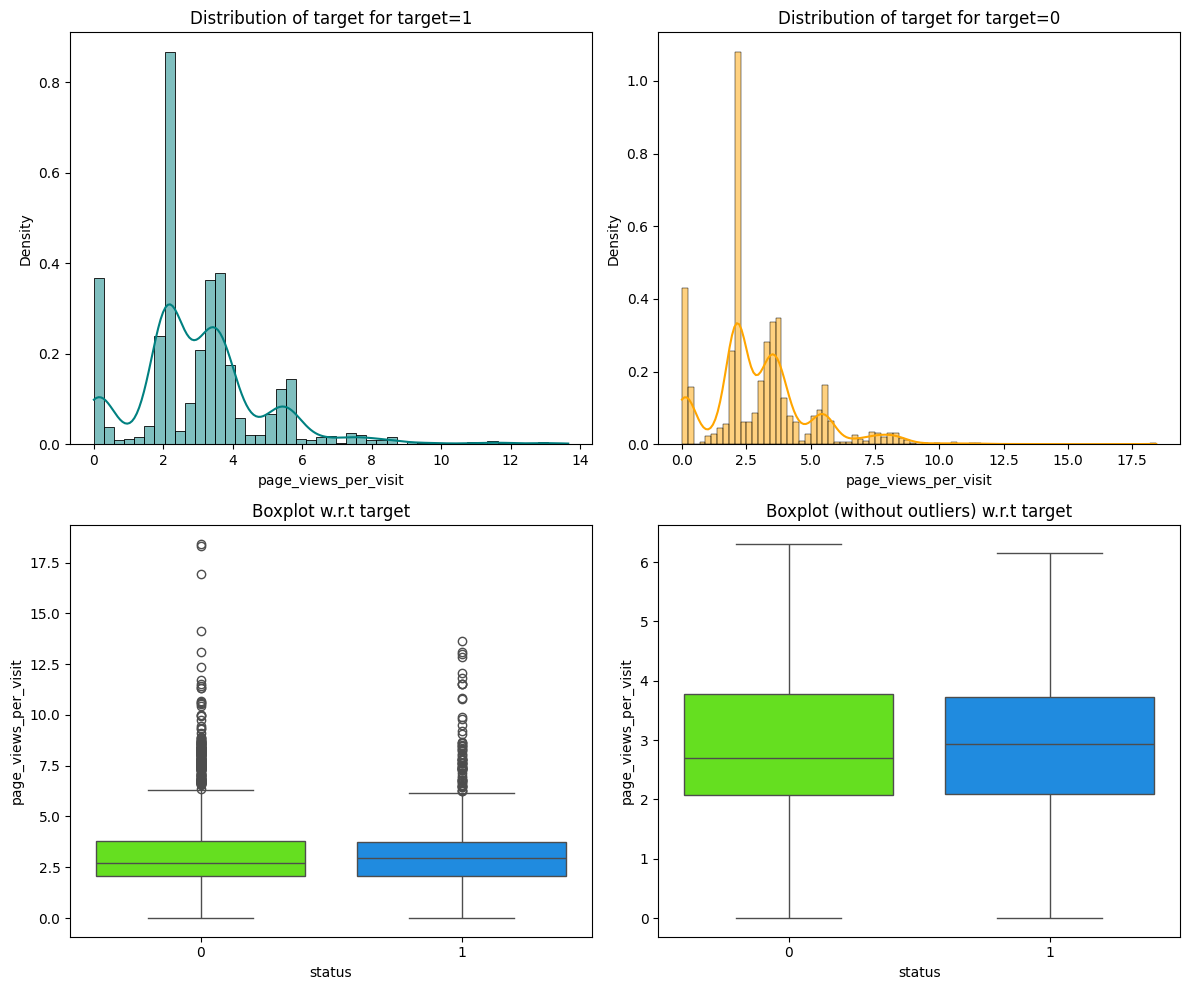

In [ ]:
# Distribution plot for the numerical values page_views_per_visit and status
distribution_plot_wrt_target(data_copy, "page_views_per_visit", "status")

**Observations:**

The page_views_per_visit data is skewed right slightly and has multiple peaks and has quite a few outliers for status of 0 and 1.  Both status of 0 and 1 seem to have a mean around 2.7 pages per visit.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## **Checking for outliers in numerical data**

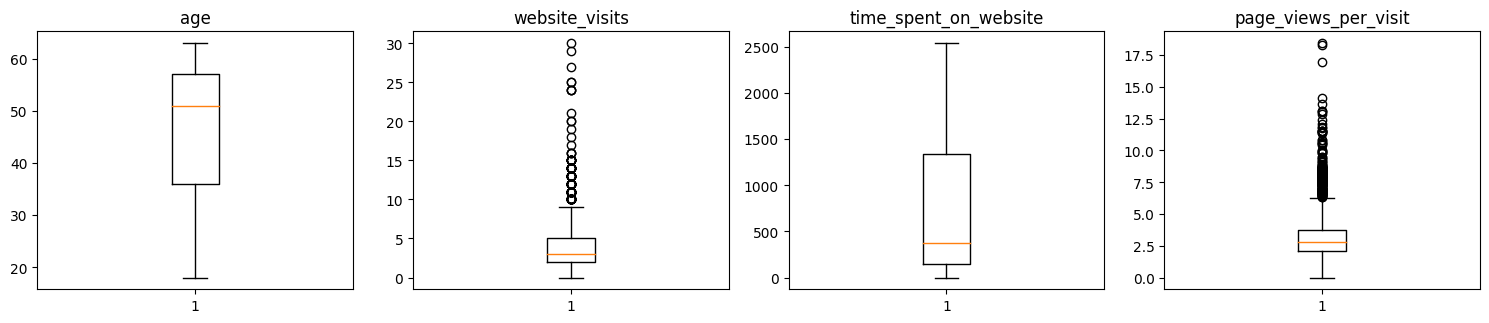

In [ ]:
# outlier detection using boxplot
numeric_columns = data_copy.select_dtypes(include=np.number).columns.tolist()
# dropping status as it is a temporal variable and our dependent value
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

The page_views_per_visit data and website visits both have outliers, but the majority are close to the 75 percentile and there are only a small percentage of outliers.

## **Preparing the data for the Decision Tree Modeling**

In [ ]:
# Putting the object columns names in a list
data_copy.select_dtypes(include = ['object']).columns.tolist()

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [ ]:
# Changing object data to numerical data and creating new columns for each category in the object columns, also hiding the first column in each seperation
data_copy2 = pd.get_dummies(
    data_copy, columns = data_copy.select_dtypes(include = ['object']).columns.tolist(),
    drop_first = True
)

In [ ]:
# Showing the information for the updated data set
data_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   status                          4612 non-null   int64  
 5   current_occupation_Student      4612 non-null   bool   
 6   current_occupation_Unemployed   4612 non-null   bool   
 7   first_interaction_Website       4612 non-null   bool   
 8   profile_completed_Low           4612 non-null   bool   
 9   profile_completed_Medium        4612 non-null   bool   
 10  last_activity_Phone Activity    4612 non-null   bool   
 11  last_activity_Website Activity  4612 non-null   bool   
 12  print_media_type1_Yes           46

In [ ]:
# Showing the first and last five rows of the new data set
data_copy2

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,0,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,0,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,1,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.914,0,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,0,False,True,False,False,True,True,False,False,False,False,True,False
4608,55,8,2327,5.393,0,False,False,False,False,True,False,False,False,False,False,False,False
4609,58,2,212,2.692,1,False,False,True,False,False,False,False,False,False,False,False,False
4610,57,1,154,3.879,0,False,False,False,False,True,False,True,True,False,False,False,False


## **Seperating the dependent and independent variable and splitting the train/test data**

In [ ]:
# Seperating the data between independent values and the dependent value
x = data_copy2.drop('status', axis=1)
y = data_copy2['status']

In [ ]:
# Seperating the test and train data with the training data having 80 percent of the data and the test data having 20 percent of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
# Showing the shape of training and test data respectively
x_train.shape, x_test.shape

((3689, 16), (923, 16))

In [ ]:
# Showing the percentage of status 0 and 1 in the training and test data respectively
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
status
0   0.705
1   0.295
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.688
1   0.312
Name: proportion, dtype: float64


## **Function for Classification and Confusion Matrix**

In [ ]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

## Building a Decision Tree model

In [ ]:
# Creating a Decision Tree Classifier for our training data
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



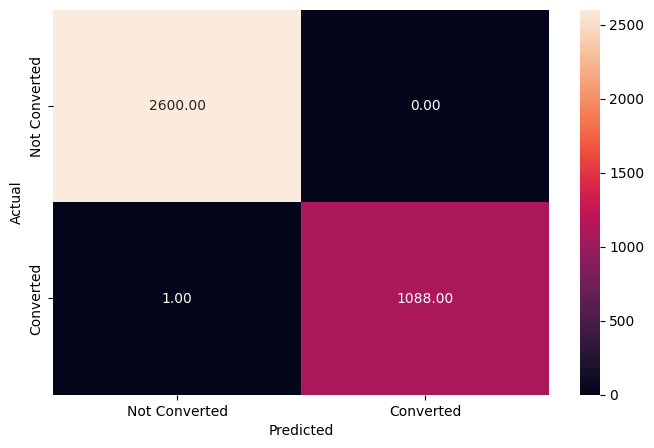

In [ ]:
## Checking performance on the training data
y_pred_train1 = dt_classifier.predict(x_train)

metrics_score(y_train, y_pred_train1)

**Observations:**

The training Decision Tree data is overfitted.

In [ ]:
# Checking performance on the testing data
y_pred_test1 = dt_classifier.predict(x_test)

metrics_score(y_test, y_pred_test1)

NameError: name 'dt_classifier' is not defined

**Observations:**

There is a significant difference between the training and test data, this algorithm will need to tuned.

## Model Performance evaluation and improvement

In [ ]:
# Choose the type of classifier and tuning the Decision Tree Classifier
dt_classifier_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dt_classifier_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dt_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dt_classifier_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2600
           1       0.71      0.86      0.78      1089

    accuracy                           0.85      3689
   macro avg       0.82      0.86      0.83      3689
weighted avg       0.87      0.85      0.86      3689



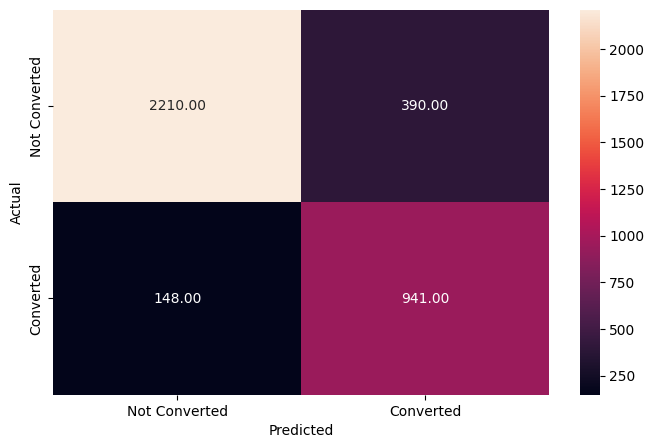

In [ ]:
# Checking performance on the training data
y_pred_train2 = dt_classifier_tuned.predict(x_train)

metrics_score(y_train, y_pred_train2)

**Observations:**

The Decision Tree algorithm is not overfitted on the training set, but could use some small improvements.  Since recall is more important for not loosing a customer this is a better model.

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       635
           1       0.72      0.83      0.77       288

    accuracy                           0.85       923
   macro avg       0.82      0.84      0.83       923
weighted avg       0.86      0.85      0.85       923



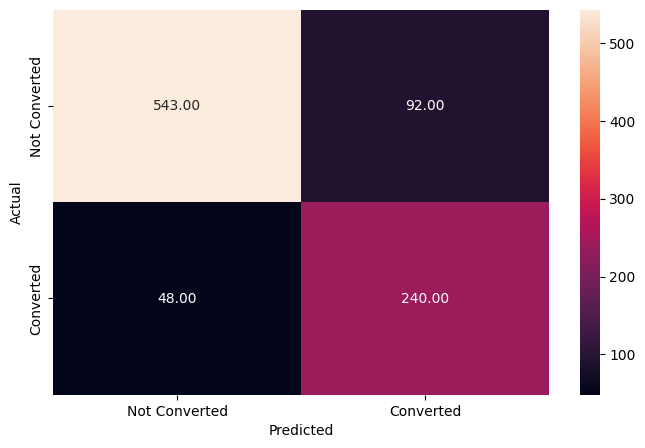

In [ ]:
# Checking performance on the testing data
y_pred_test2 = dt_classifier_tuned.predict(x_test)

metrics_score(y_test, y_pred_test2)

**Observations:**

The Decision Tree algorithm is closer now between the training set and test set, but could use some small improvements.  Since recall is more important for not loosing a customer this is a better model.

In [ ]:
# Updating the tuning since a depth of 6 has too much data
tree_model = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, criterion='entropy', max_depth = 3,
                       min_samples_leaf = 10, random_state = 1)

# Fit the best algorithm to the data
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=10, random_state=1)

In [ ]:
# Reviewing the columns in the current data before looking at the Decision Tree
features = list(x.columns)
features

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'current_occupation_Student',
 'current_occupation_Unemployed',
 'first_interaction_Website',
 'profile_completed_Low',
 'profile_completed_Medium',
 'last_activity_Phone Activity',
 'last_activity_Website Activity',
 'print_media_type1_Yes',
 'print_media_type2_Yes',
 'digital_media_Yes',
 'educational_channels_Yes',
 'referral_Yes']

In [ ]:
# Plotting the Decision Tree tuned with a depth of 3
features = list(x.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

NameError: name 'x' is not defined

In [ ]:
# Showing the Decision Tree in a text tree format
print(tree.export_text(tree_model, feature_names=features, show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 24.50
|   |   |   |--- weights: [30.30, 3.50] class: 0
|   |   |--- age >  24.50
|   |   |   |--- weights: [247.20, 0.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [138.00, 62.30] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [30.30, 49.70] class: 1
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 417.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [87.00, 197.40] class: 1
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [162.00, 5.60] class: 0
|   |--- time_spent_on_website >  417.50
|   |   |--- last_activity_Phone Activity <= 0.50
|   |   |   |--- weights: [42.60, 368.20] class: 1
|   |   |--- last_activity_Phone Activity >  0.50
|   |   |   |--- weights: [42.60, 75.60] class: 1



In [ ]:
# Importance of features in the tree building
print (pd.DataFrame(dt_classifier_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
time_spent_on_website          0.283
first_interaction_Website      0.256
profile_completed_Medium       0.220
age                            0.070
current_occupation_Unemployed  0.048
last_activity_Website Activity 0.036
last_activity_Phone Activity   0.035
page_views_per_visit           0.017
website_visits                 0.014
current_occupation_Student     0.009
profile_completed_Low          0.007
referral_Yes                   0.003
educational_channels_Yes       0.002
print_media_type1_Yes          0.000
print_media_type2_Yes          0.000
digital_media_Yes              0.000


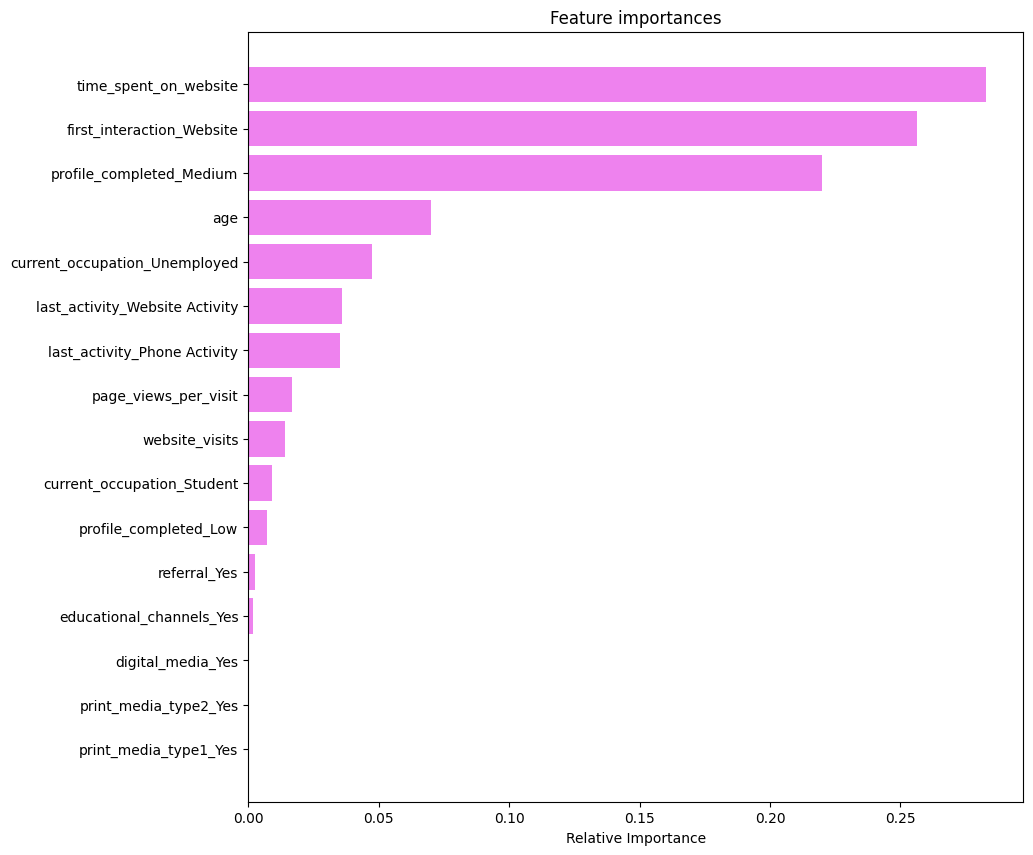

In [ ]:
# Bar graph to show the feature importance for this decision tree
importances = dt_classifier_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature importances')
plt.barh(range(len(features)), importances[indices], color='violet', align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

first_interaction_Website, time_spent_on_website, and profile_completed_Medium seem to have the most importance in this decision tree.

## Building a Random Forest model

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1, criterion = "entropy")

rf_estimator.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



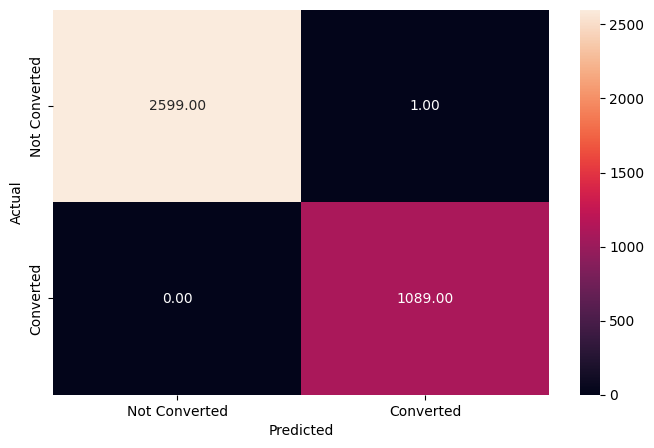

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train3)

**Observations:**

The Random Forest algorithm is not as overfitted on the training set, but could use some improvements.

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       635
           1       0.83      0.72      0.77       288

    accuracy                           0.87       923
   macro avg       0.86      0.83      0.84       923
weighted avg       0.87      0.87      0.87       923



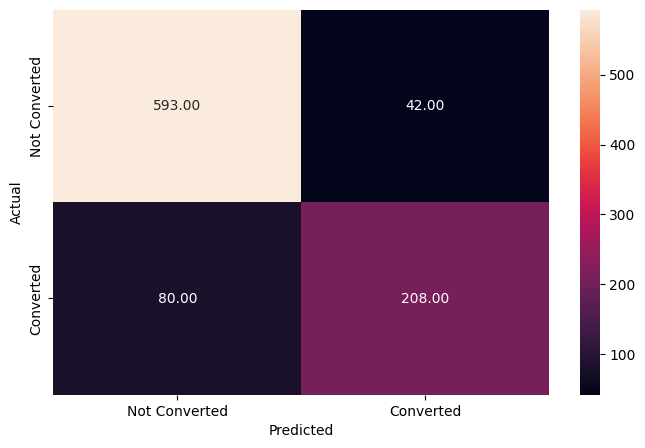

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test3)

**Observations:**

There is a significant difference between the training and test data, this algorithm will need to tuned.

## Model Performance evaluation and improvement

In [ ]:
# Choose the type of classifier for the Random Forest Tuned set
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [80, 90, 100, 110],
    "max_depth": [None, 5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.9,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2600
           1       0.84      0.78      0.81      1089

    accuracy                           0.89      3689
   macro avg       0.88      0.86      0.87      3689
weighted avg       0.89      0.89      0.89      3689



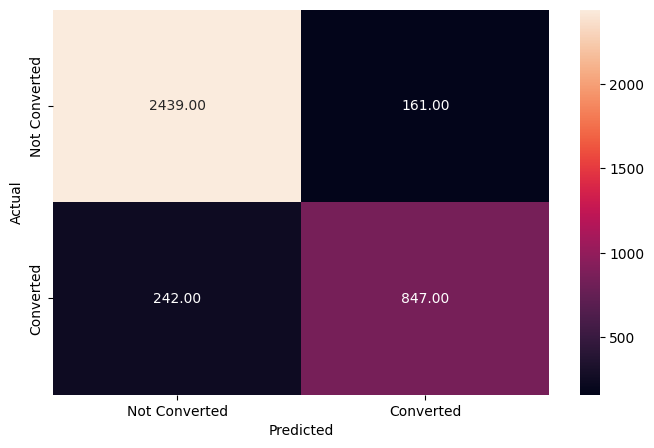

In [ ]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned_base.predict(x_train)

metrics_score(y_train, y_pred_train4)

**Observations:**

The Random Forest algorithm is not overfitted on the training set, but could use some small improvements.  Since recall is more important for not loosing a customer this model needs some work.

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       635
           1       0.83      0.73      0.78       288

    accuracy                           0.87       923
   macro avg       0.86      0.83      0.84       923
weighted avg       0.87      0.87      0.87       923



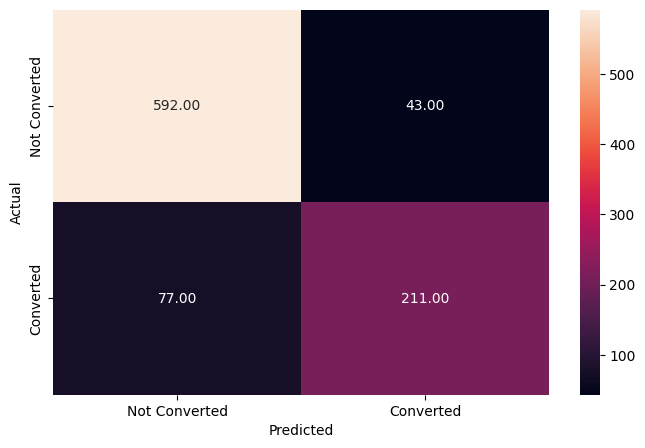

In [ ]:
# Checking performance on the testing data
y_pred_test4 = rf_estimator_tuned_base.predict(x_test)

metrics_score(y_test, y_pred_test4)

**Observations:**

The Random Forest algorithm is closer now between the training set and test set, but could use some small improvements.  Since recall is more important for not loosing a customer this model needs some work.

In [ ]:
# Choose the type of classifier for the second Random Forest tuned set
rf_estimator_tuned2 = RandomForestClassifier(criterion = "entropy", random_state = 1)

# Grid of parameters to choose from
parameters = {"n_estimators": [90, 100],
    "max_depth": [6, 7],
    "min_samples_leaf": [5, 10],
    "max_features": [0.8, 0.9],
    "max_samples": [0.8, 0.9],
    "class_weight" : ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned2 = grid_obj.best_estimator_



In [ ]:
6# Fitting the best algorithm to the training data
rf_estimator_tuned2.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2600
           1       0.70      0.87      0.78      1089

    accuracy                           0.85      3689
   macro avg       0.82      0.86      0.83      3689
weighted avg       0.87      0.85      0.86      3689



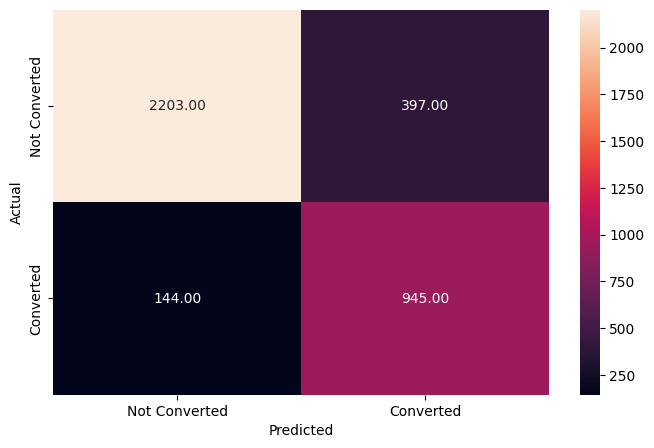

In [ ]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned2.predict(x_train)

metrics_score(y_train, y_pred_train5)

**Observations:**

The Random Forest algorithm is not overfitted on the training set.  Since recall is more important for not loosing customers this model has a pretty good fit.

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       635
           1       0.73      0.84      0.78       288

    accuracy                           0.85       923
   macro avg       0.82      0.85      0.83       923
weighted avg       0.86      0.85      0.85       923



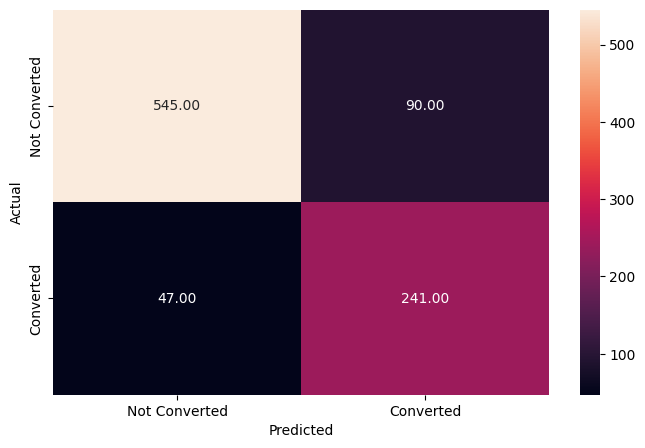

In [ ]:
# Checking performance on the testing data
y_pred_test5 = rf_estimator_tuned2.predict(x_test)

metrics_score(y_test, y_pred_test5)

**Observations:**

The Random Forest algorithm is closer now between the training set and test set.  Since recall is more important for not loosing a customer this model is a pretty good fit and a little better than the Decision Tree Tuned model.

In [ ]:
# Bar graph to show the feature importance for this second random forest tuned
importances = rf_estimator_tuned2.feature_importances_

indices = np.argsort(importances)

feature_names = list(x.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

NameError: name 'rf_estimator_tuned2' is not defined

**Observations:**

first_interaction_Website, time_spent_on_website, and profile_completed_Medium seem to have the most importance in this decision tree.

## Actionable Insights and Recommendations

### **Conclusions:**

*  We have been able to build tree-based models that can be used to help ExtraaLearn predict which leads will be converted.
*  The Random Forest is giving the an F1 score of 77%, and macro average of 84%, on the test data.
*  Looking at the important variables, based on the feature importances, we can say that the time_spent_on_website, first_interaction_Website, profile_completed_medium, are the major drivers of the model.
*  The Decision Tree model is highly overfitting the training data and gives an F1 score of 71% on the test data.  The tuned Decision Tree model is very balanced and gives more generalized results on both training and testing data.
*  Using the second tuned random forest model which has a 78% F1 score with a higher recall score (84%) than precision (73%), ExtraaLearn will be able to predict which leads are more likely to be converted.  ExtraaLearn will be able to maintain a balance between resources and brand equity.


### **Recommendations:**

*  time_spent_on_website can play a key role in whether a lead is converted or not.  It seems the longer time spent on the website the higher the probability of a converted lead.  So finding ways to get the customer to stay and explore would be a good idea.
*  first_interaction_Website can also plays a key role in lead conversion, so maybe making sure that the website shows up close to the top of search engine searches on key words would be a good idea.
*  profile_completed_medium also plays a key role in lead conversion, so making sure that is captured and that the profile interface is user friendly would be good business decisions.
*  current_occupation_unemployed show as a higher key role and could be pursued, maybe working with workforce employment agencies.
*  last_activity_Website_Activity shows as a higher key role and could be strengthed with website improvement and ranking improvements.
*  referral_Yes is lower on the list, but has a 68% conversion rate.  This could be developed to help improve business leads/conversions.  Maybe an incentive plan or an improvement in the incentive plan could raise the number referrals.